<a href="https://colab.research.google.com/github/wall456/CTG/blob/main/Final_Report_CTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computerizing Cardiotocography Assessments**
Kimberly Wall

December 2020

Tarleton State University

kimberly.wall@go.tarleton.edu







# **Background**

Cardiotocography (CTG), sometimes called electronic fetal monitoring (EFM), consists of two transducers placed on the mother's abdomen during childbirth. One transducer tracks fetal heart rate (FHR), and the other tracks uterine contractions (UC), and the readings, called tracings, are printed on paper from the cardiotocograph. The medical team then assesses the tracings to make decisions regarding care. Because visual analysis is still the most widespread method of assessing CTG tracings, there is the issue of human error. Sometimes errors lead to unnecessary intervention when the fetus was never in any danger, and other times it leads to hypoxia-related birth defects, like cerebral palsy. Computerizing these assessments has the potential to save lives all over the world. 

Implementing a machine learning classification algorithm could replace visual analysis and remove the problem of human error. The dataset used is publicly available on Kaggle, and consists of 2126 instances of CTG tracings. Each one has been classified by a medical expert as normal (1) , suspicious (2), or pathological (3). Suspicious cases arise when further exploration or testing is required to fully assess the situation, and pathological is the case that the fetus is in immediate danger and requires intervention. 



# **Preprocessing**

Since the dataset was also built to perform a ten-class experiment, those corresponding columns were removed. There were three empty rows at the bottom of the dataset that were also removed. After the data was cleaned, stratified, and shuffled, a 20% holdout set was removed and the remaining data was used for training. Ten-fold cross validation was performed on the training set within all model pipelines. Principal Components Analysis was also implemented to attempt dimensionality reduction. In addition, each model was run with three different scalers: Standard, MinMax, and Robust.

# **Models**

Five different classifiers were trained and tuned to find the best predictor of fetal state with respect to CTG:


1.   *K*-Nearest Neighbors 
2.   Naive Bayes 
3.   Decision Tree
4.   Random Forest
5.   Support Vector Machine

*K*-nearest neighbors was tuned with a range of values for number of neighbors used, Euclidean distance parameter *p*, and weights (either uniform or distance). 

Naive Bayes has a few subtypes to consider. Since the features were neither binary nor discrete, Gaussian Naive Bayes was chosen. No hyperparameters were tuned for this model, it was run with default values only.

Decision Tree hyperparameters tuned were splitting criterion and max depth. This was also the case for the ensemble tree method, Random Forest.

Lastly, support vector machine was tuned with three values for C and all four kernel options.

# **Performance**

Since this is a multi-class problem with significant class imbalance, all models were evaluated using macro F-score. The best version of *k*-nearest neighbors was with StandardScaler, four neighbors, p=1, and distance weights, with an F-score of 85.74%.





Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


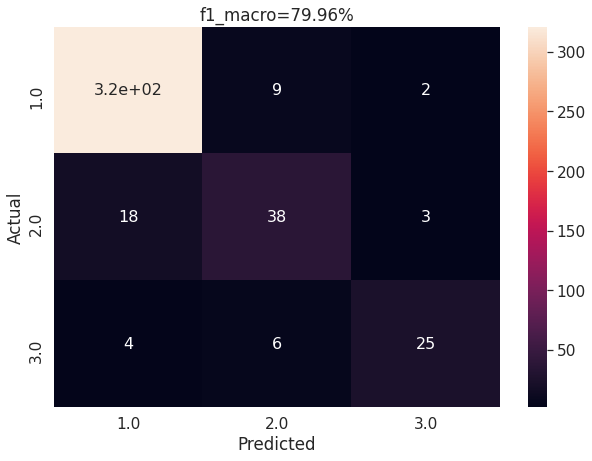

   classify__n_neighbors  classify__p  ... dim_reduce__n_components     score
0                      4            1  ...                       12  0.857422

[1 rows x 5 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%run -i '/content/drive/MyDrive/Colab Notebooks/Final_Project_DS1_2020/knn_best.ipynb'

The best performing version of Gaussian naive Bayes was when the dimension had been reduced to four components and scaled using StandardScaler, with an F-score of 75.95%.

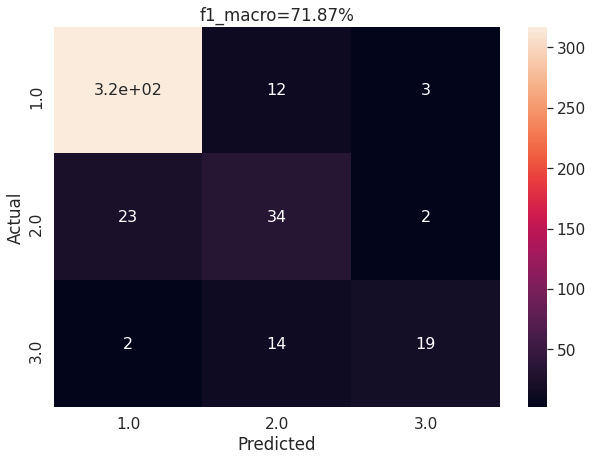

   dim_reduce__n_components     score
1                         4  0.759535


In [ ]:
%run -i '/content/drive/My Drive/Colab Notebooks/Final_Project_DS1_2020/GaussianNB_best.ipynb'

For Decision Tree, the best model resulted from RobustScaler, entropy criterion, max depth of 21, and dimensionality reduction from 21 to 18, with an F-score of 81.62%.

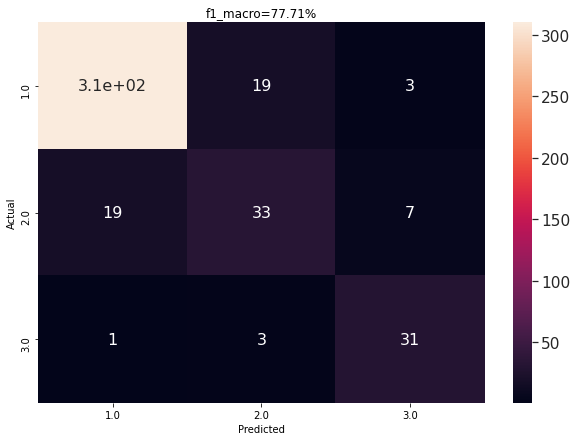

  classify__criterion  classify__max_depth  dim_reduce__n_components     score
3             entropy                   21                        18  0.808766


In [ ]:
%run -i '/content/drive/My Drive/Colab Notebooks/Final_Project_DS1_2020/Decision_tree_best.ipynb'

Random Forest performed best with RobustScaler, entropy criterion, max depth of nine, and 14 feature components with an F-score of 83%.

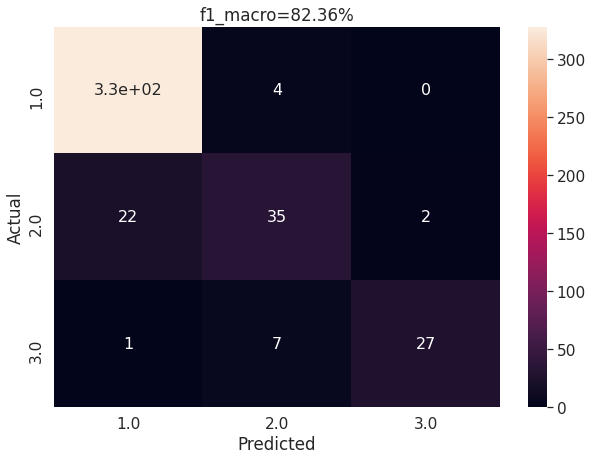

  classify__criterion  classify__max_depth  ...  dim_reduce__n_components     score
5             entropy                    9  ...                        14  0.833662

[1 rows x 5 columns]


In [ ]:
%run -i '/content/drive/My Drive/Colab Notebooks/Final_Project_DS1_2020/Random_forest_best.ipynb'

Finally, the best overall performer was Support Vector Machine. Best fit hyperparameters were as follows:
*  StandardScaler
*  kernel: radial basis function (rbf)
*  C: 100
*  19 dimensions

This model outperformed all other models with an F-score of 87.68%.




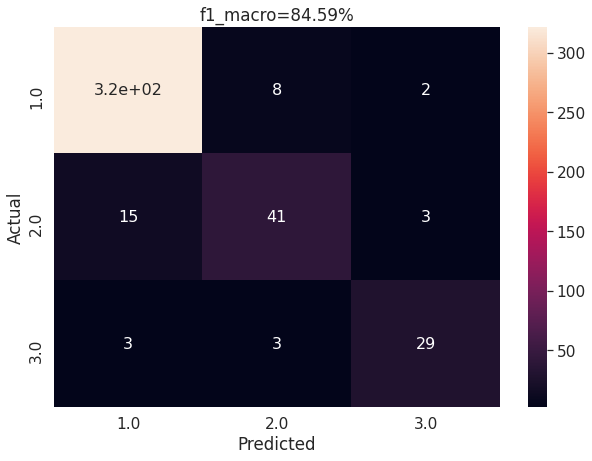

   classify__C classify__kernel  dim_reduce__n_components     score
3          100              rbf                        19  0.876844


In [ ]:
%run -i '/content/drive/My Drive/Colab Notebooks/Final_Project_DS1_2020/svc_best.ipynb'

See the summary comparison table below:

Algorithm | Optimal Hyperparameters | Cross-Validated Performance | Generalization Performance
---|---|---|---
*K*-Nearest Neighbors|k = 5|85.74%|79.96%
---|p = 1|---|---
---|weight = distance|---|---
Gaussian Naive Bayes|default|75.95%|71.87%
Decision Tree|criterion = entropy|81.62%|77.71%
---|max depth = 21|---|---
Random Forest|criterion = entropy|83.37%|82.36%
---|max depth = 9|---|---
Support Vector Machine|kernel = rbf|87.68%|84.59%
---|C = 100|---|---

#**Conclusion**

Support Vector Machine was the overall best performer. This is not surprising since it is considered one of the most powerful classifiers there is, due to the underlying math and its ability to avoid overfitting. While 84.59% general performance is far from perfect, it is also nothing to dismiss. This is a great start for future research in this area. The next step would be to further explore other classifying algorithms and hyperparameter tuning, as well as application of bagging, boosting, or other ensemble methods. 

#**References**
Akshat Dubey. (2020). Kaggle. https://www.kaggle.com/akshat0007/fetalhr